In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

## Simple Neural Network

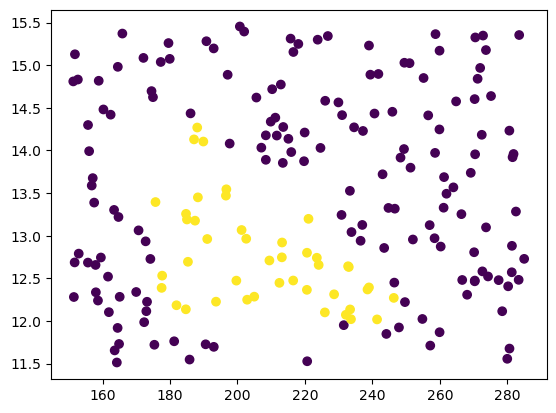

In [5]:
""" Creates a coffee roasting data set.
    roasting duration: 12-15 minutes is best
    temperature range: 175-260C is best
"""
rng = np.random.default_rng(2)
X = rng.random(400).reshape(-1,2)
X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
Y = np.zeros(len(X))

i=0
for t,d in X:
    y = -3/(260-175)*t + 21
    if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
        Y[i] = 1
    else:
        Y[i] = 0
    i += 1

Y = Y.reshape(-1,1)
plt.scatter(X[:,0], X[:,1], c = Y)

In [14]:
print(X.shape)
print(Y.shape)

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)

(200, 2)
(200, 1)


In [19]:
Xt = np.tile(Xn, (1000,1))
Yt = np.tile(Y, (1000,1))

In [20]:
model = Sequential(
    [
        Dense(3, activation="sigmoid", input_shape = (2,), name = "layer_1"),
        Dense(1, activation="sigmoid", name = "layer_2")
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 3)                 9         
                                                                 
 layer_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 3s 459us/step - loss: 0.1833
Epoch 2/10
6250/6250 [==============================] - 3s 453us/step - loss: 0.1158
Epoch 3/10
6250/6250 [==============================] - 3s 448us/step - loss: 0.0498
Epoch 4/10
6250/6250 [==============================] - 3s 439us/step - loss: 0.0164
Epoch 5/10
6250/6250 [==============================] - 3s 436us/step - loss: 0.0103
Epoch 6/10
6250/6250 [==============================] - 3s 452us/step - loss: 0.0071
Epoch 7/10
6250/6250 [==============================] - 3s 502us/step - loss: 0.0050
Epoch 8/10
6250/6250 [==============================] - 3s 462us/step - loss: 0.0035
Epoch 9/10
6250/6250 [==============================] - 3s 467us/step - loss: 0.0024
Epoch 10/10
6250/6250 [==============================] - 3s 467us/step - loss: 0.0017


In [23]:
W1, b1 = model.get_layer("layer_1").get_weights()
W2, b2 = model.get_layer("layer_2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[  0.1348612   14.75781    -10.8726015 ]
 [ 10.430548    12.291012    -0.28257492]] 
b1: [ 12.577098   2.032749 -11.749715]
W2:
 [[ 43.79486 ]
 [-45.559547]
 [-53.453735]] 
b2: [-13.559907]


In [25]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 23ms/step
predictions = 
 [[9.8959774e-01]
 [2.1507091e-07]]


In [28]:
yhat = np.array([0,0])
for i in range(len(predictions)):
    if predictions[i] > 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"Decision = {yhat}")
    

Decision = [1 0]
